In [6]:
!pip install scikit-optimize

In [26]:
# ======================================
# 1. Import Libraries
# ======================================

In [37]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ExpSineSquared, DotProduct, ConstantKernel, RationalQuadratic
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
from itertools import product
from skopt import gp_minimize
from skopt.space import Real

In [38]:
# ======================================
# 2. Add updated inputs for function-1
# ======================================

In [39]:
inputs2 = np.array([[0.66579958, 0.12396913],
       [0.87779099, 0.7786275 ],
       [0.14269907, 0.34900513],
       [0.84527543, 0.71112027],
       [0.45464714, 0.29045518],
       [0.57771284, 0.77197318],
       [0.43816606, 0.68501826],
       [0.34174959, 0.02869772],
       [0.33864816, 0.21386725],
       [0.70263656, 0.9265642 ],
       [0.000025, 0.000025],
       [0.001200, 0.001200],
       [0.110000, 0.110000],
       [0.000100, 0.000100],
       [0.080000, 0.080000],
       [0.060000, 0.060000],
       [0.006000, 0.006000],
       [0.000050, 0.000050],
       [0.004000, 0.004000],
       [0.003000, 0.003000],
       [0.001000, 0.001000],
       [0.100000, 0.100000]])

X = inputs2

In [40]:
# ======================================
# 2. Add updated outputs for function1
# ======================================

In [41]:
outputs2 = np.array([ 0.53899612,  0.42058624, -0.06562362,  0.29399291,  0.21496451,
        0.02310555,  0.24461934,  0.03874902, -0.01385762, 0.61120522, -0.1841135779417729, -0.17566350126491134, 0.11568667652850105, 
        0.10330297700883484, 0.044567047001659726,
        -0.055538881984308765, 0.010746119699143882, 0.004360342692348476, -0.016378446601106975, 
        -0.010453897441876846, -0.031111129030813367, -0.06072598968023439])

y = outputs2

In [42]:
# ======================================
# 3. Converting to absolute values
# ======================================

In [43]:

X = inputs2
y = np.abs(outputs2)

In [44]:
# ======================================
# 4. Plotting input and output on a graph
# ======================================

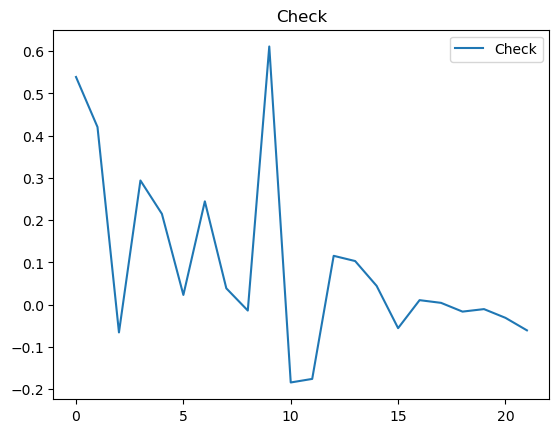

In [45]:
df = pd.DataFrame(outputs2, columns = ['Check'], index = range(outputs2.size))
plot = df.plot(title="Check")

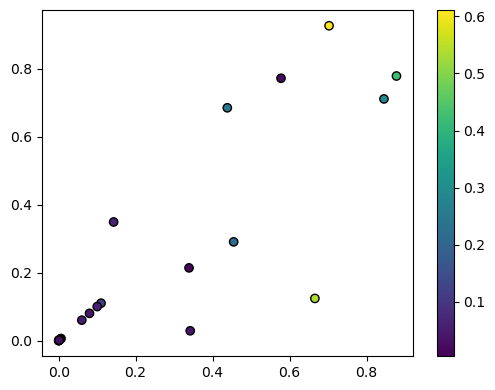

In [46]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="viridis")

plt.colorbar()

plt.tight_layout()
plt.show()

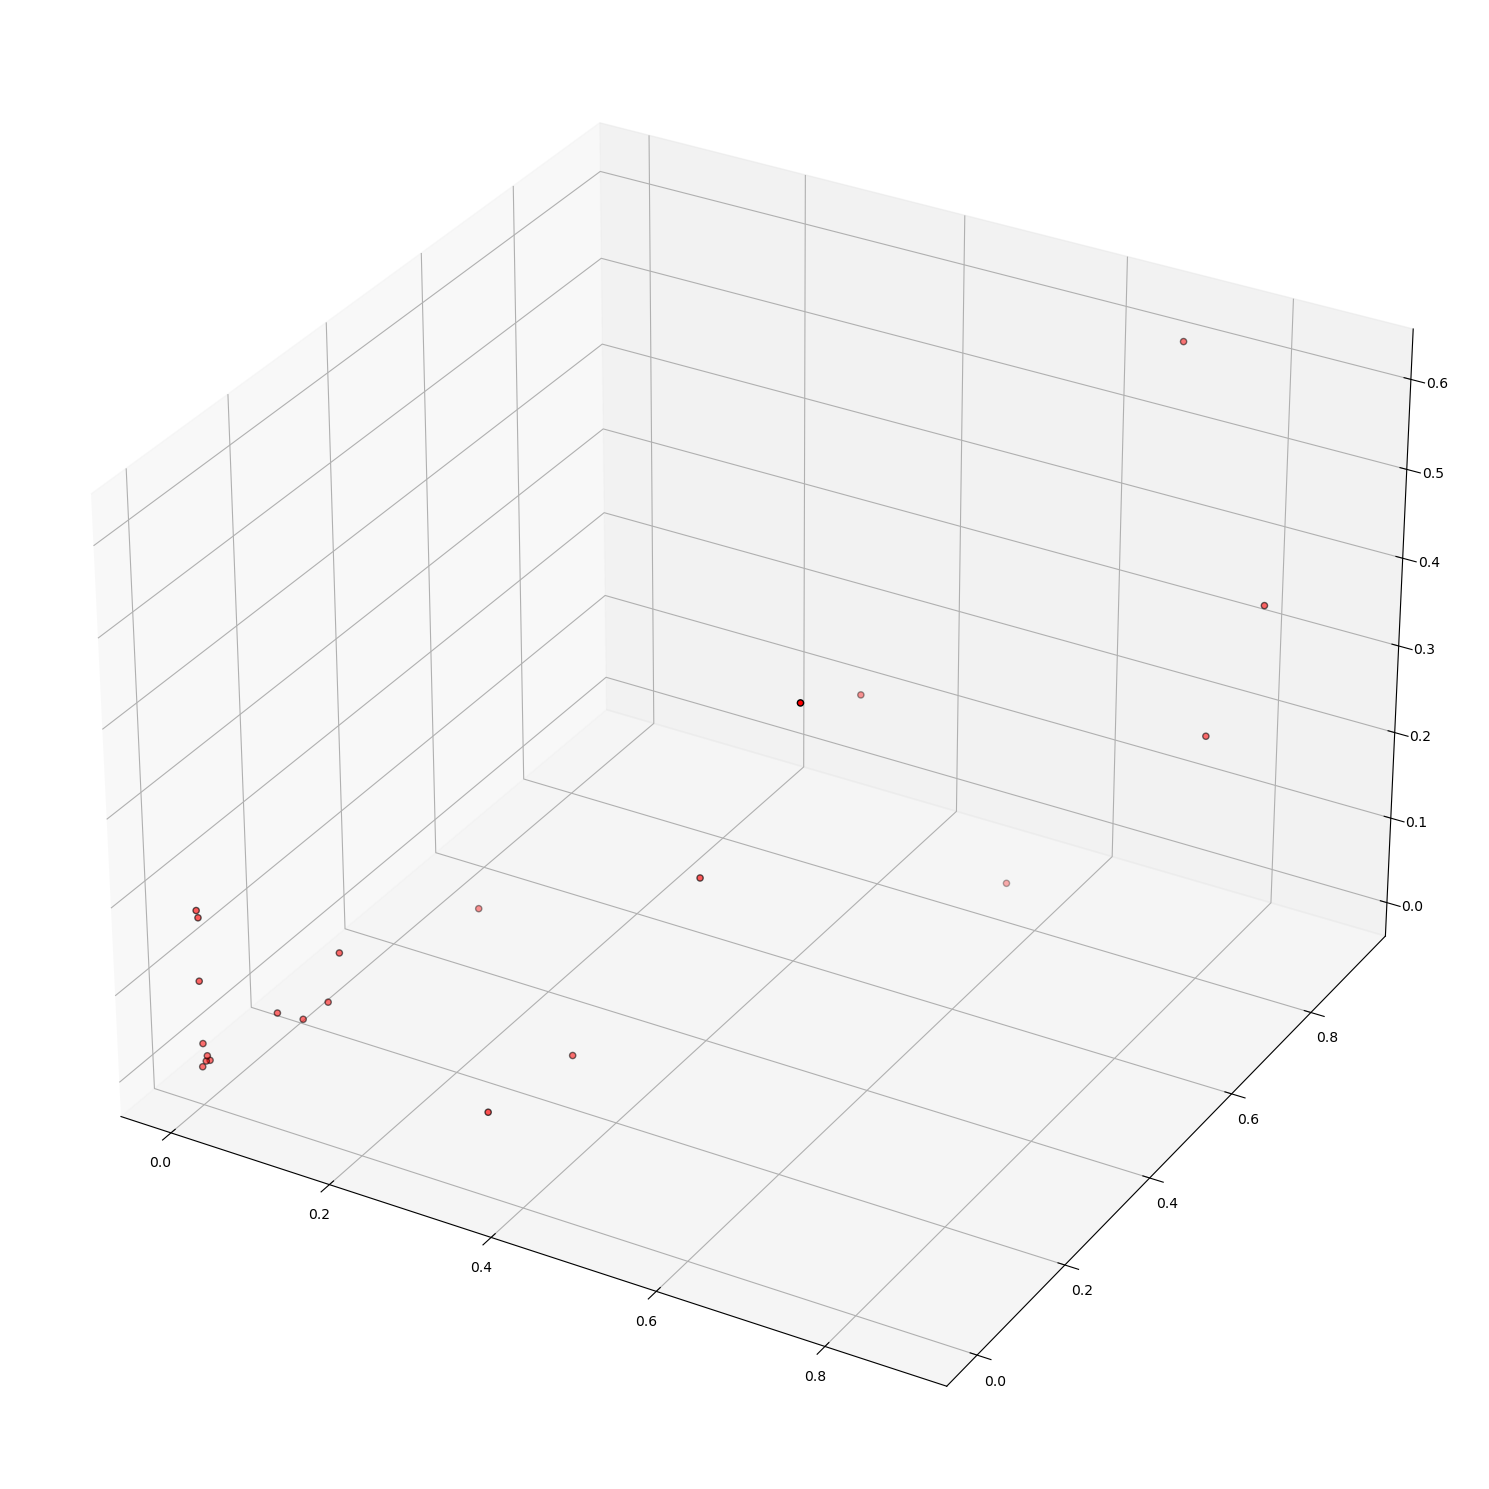

In [47]:
fig = plt.figure(figsize=(20, 15))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c = 'red', edgecolors="k")

plt.tight_layout()
plt.show()

In [48]:
#Define kernel used
kernel_best_Q2 =  ConstantKernel(1.0, (1e-3, 1e3)) * Matern(length_scale=1.5, nu=1) + WhiteKernel(noise_level=1e-1, noise_level_bounds=(1e-6, 1e1))

#Initialize Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel_best_Q2, n_restarts_optimizer=10, alpha=1e-6, normalize_y=True)

# Fit to data
gp.fit(X, y)

#Print the kernel to check if the value of optimized kernel is normal 
print("Optimized kernel:", gp.kernel_)

Optimized kernel: 1.21**2 * Matern(length_scale=0.196, nu=1) + WhiteKernel(noise_level=0.155)


In [ ]:
#define UCB
def ucb_gs(X_candidates, gp, kappa=1.0):
    mu, sigma = gp.predict(X_candidates, return_std=True)
    return mu + kappa * sigma

#Generate candidate points (dense grid in [0,1]^2)
x1_gs = np.linspace(0, 1, 5000)
x2_gs = np.linspace(0, 1, 5000)
X1_gs, X2_gs = np.meshgrid(x1_gs, x2_gs)
X_grid_gs = np.column_stack([X1_gs.ravel(), X2_gs.ravel()])

# Compute UCB
ucb_values_gs = ucb_gs(X_grid_gs, gp, kappa=0.5)

# Pick next query point (max UCB)
next_point_ucb_gs = X_grid_gs[np.argmax(ucb_values_gs)]
print("Next query point (by UCB):", next_point_ucb_gs)